# bulbea
> Deep Learning based Python Library for Stock Market Prediction and Modelling

![](bulbea.png)

A canonical way of importing the `bulbea` module is as follows:

In [1]:
import bulbea as bb

### `bulbea.Share`

In order to analyse a desired share, we use the `Share` object defined under `bulbea` which considers 2 arguments - *the **source code** for the economic data* and *the **ticker symbol** for a said company*.

In [2]:
source, ticker = 'YAHOO', 'INDEX_GSPC'

Go ahead and create a `Share` object as follows:

In [3]:
share = bb.Share(source, ticker)

/home/achilles/dev/bulbea/.venv/py3/lib/python3.5/site-packages/bulbea-0.1.0-py3.5.egg/bulbea/entity/share.py:182: UserWarning: Environment variable BULBEA_QUANDL_API_KEY for Quandl hasn't been set. A maximum of 50000 calls per day can be made. Visit https://www.quandl.com to get your API key.
  warnings.warn(message)


By default, a `Share` object for a said source and symbol provides you historical data since a company's inception, as a `pandas.DataFrame` object. In order to access the same, use the `Share` object's member variable - `data` as follows:

In [4]:
data     = share.data
nsamples = 5
data.tail(nsamples)

,Open,High,Low,Close,Volume,Adjusted Close
Date,,,,,,
2017-03-23,2345.969971,2358.919922,2342.129883,2345.959961,3.260600e+09,2345.959961
2017-03-24,2350.419922,2356.219971,2335.739990,2343.979980,2.975130e+09,2343.979980
2017-03-27,2329.110107,2344.899902,2322.250000,2341.590088,3.240230e+09,2341.590088
2017-03-28,2339.790039,2363.780029,2337.629883,2358.570068,3.367780e+09,2358.570068
2017-03-29,2356.540039,2363.360107,2352.939941,2361.129883,3.106940e+09,2361.129883


In order to analyse a given attribute, you could plot the same as follows:

In [5]:
figsize = (20, 15)

% matplotlib inline

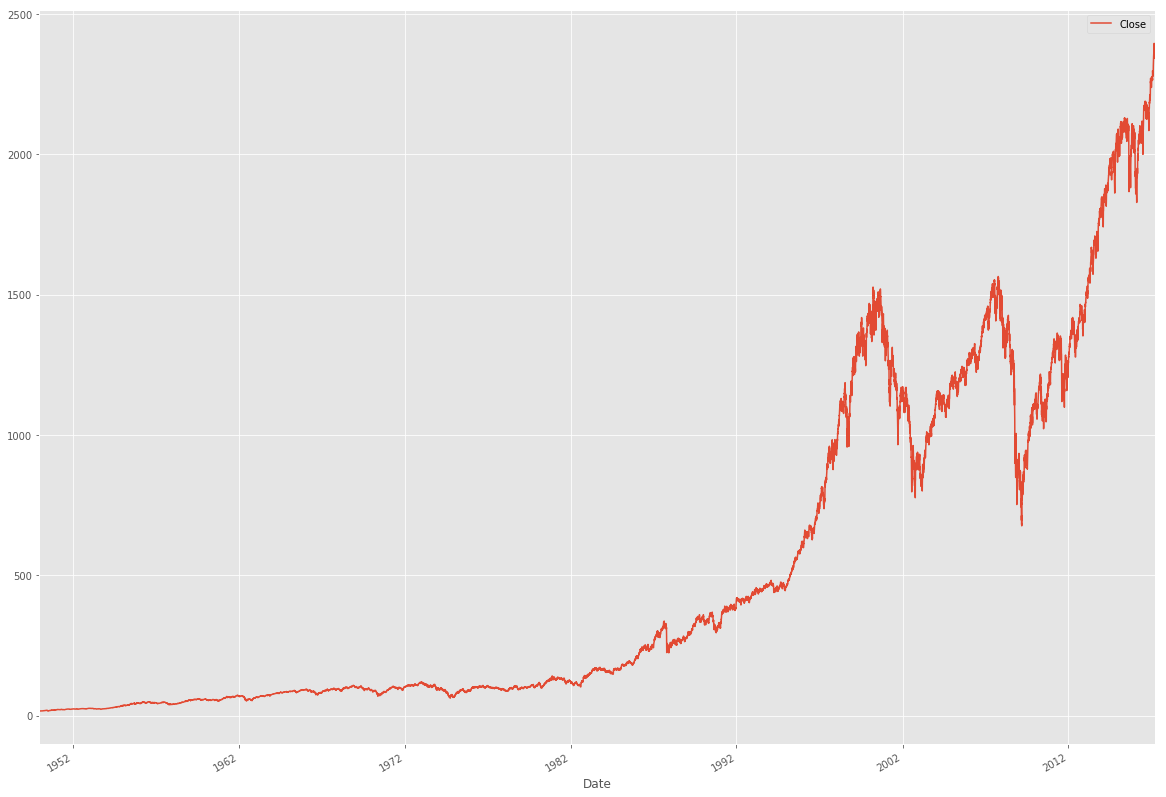

In [6]:
share.plot(figsize = figsize)

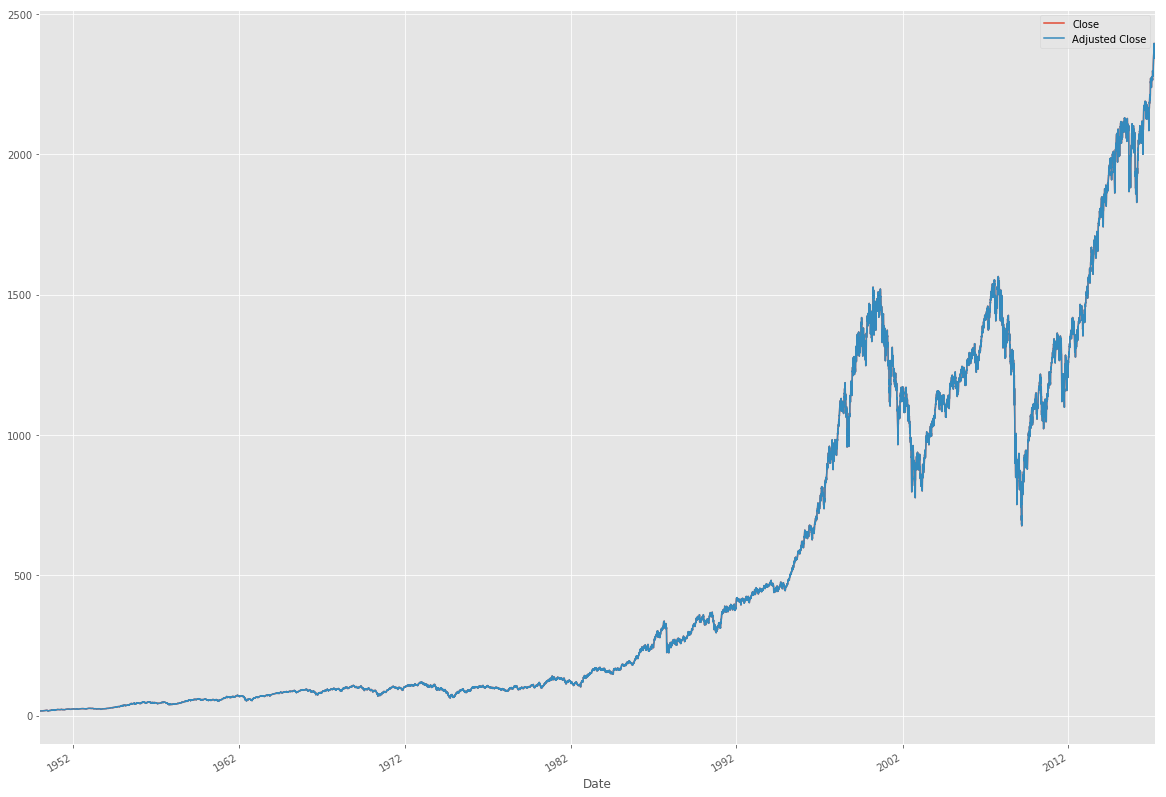

In [7]:
share.plot(['Close', 'Adjusted Close'], figsize = figsize)

### Statistics

#### Global Mean
In order to plot the **global mean** of the stock, we could do the same as follows:

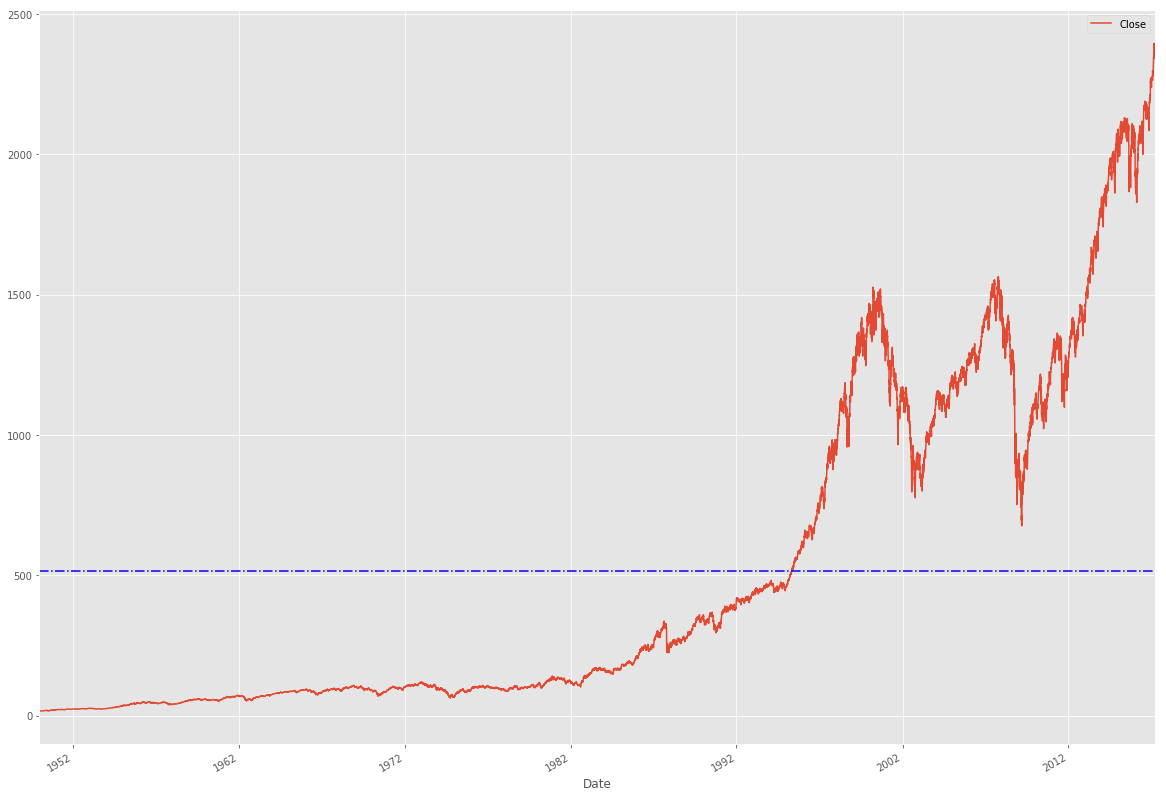

In [8]:
share.plot(figsize = (20, 15), global_mean = True)

#### Moving Averages and Bollinger Bands (R)

In [9]:
bands = share.bollinger_bands(period = 50, bandwidth = 2)
bands.tail(nsamples)

,Lower (Close),Mean (Close),Upper (Close)
Date,,,
2017-03-23,2243.205320,2329.181997,2415.158675
2017-03-24,2245.906845,2330.555195,2415.203546
2017-03-27,2249.080605,2331.978198,2414.875791
2017-03-28,2252.110173,2333.656802,2415.203430
2017-03-29,2255.871190,2335.521602,2415.172013


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f0566cd2048>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f0566b7a898>], dtype=object)

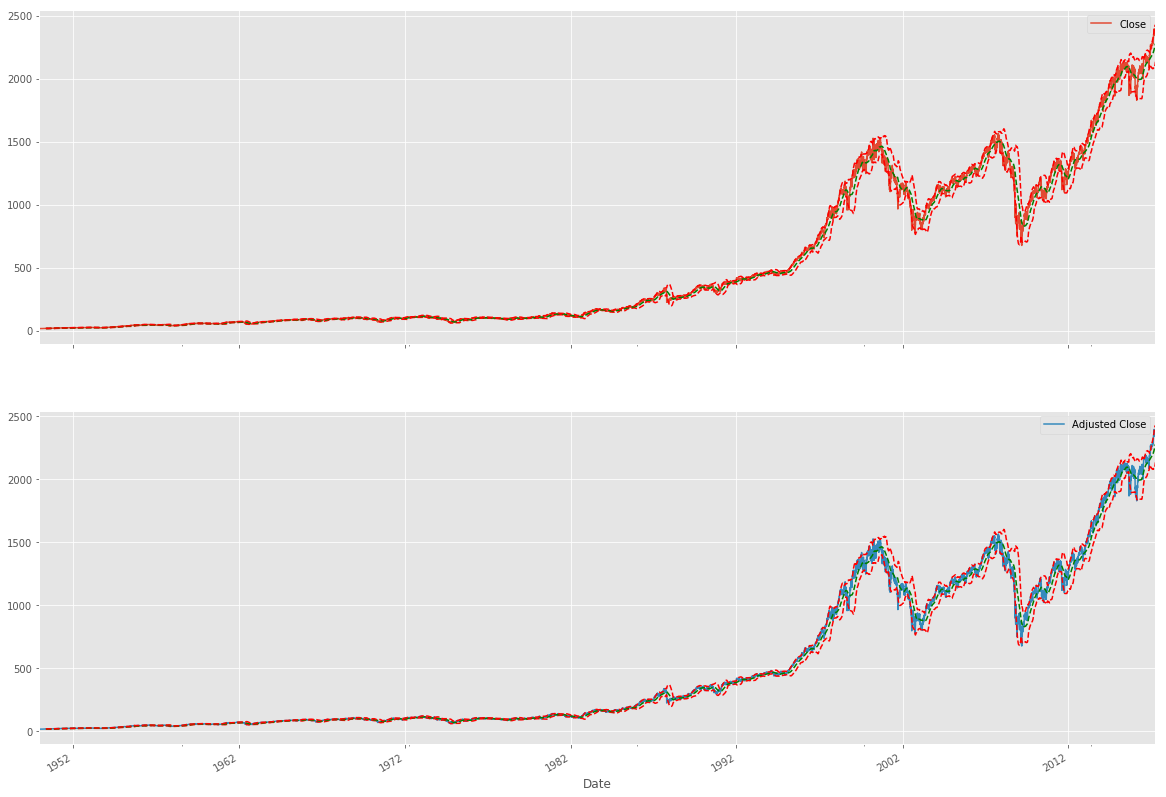

In [10]:
share.plot(['Close', 'Adjusted Close'], figsize = (20, 15), bollinger_bands = True, period = 100, bandwidth = 2)

### Training & Testing

In [11]:
from bulbea.learn.evaluation import split

In [12]:
scaler, Xtrain, Xtest, ytrain, ytest = split(share, 'Close', normalize = True)

/home/achilles/dev/bulbea/.venv/py3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/achilles/dev/bulbea/.venv/py3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [13]:
import numpy as np

In [14]:
Xtrain = np.reshape(Xtrain, (Xtrain.shape[0], Xtrain.shape[1], 1))
Xtest  = np.reshape(Xtest,  ( Xtest.shape[0],  Xtest.shape[1], 1))

### Modelling

In [15]:
layers      = [1, 100, 100, 1] # number of neurons in each layer
nbatch      = 512              
epochs      = 5     
nvalidation = 0.05

In [16]:
from bulbea.learn.models import RNNRegressor
from bulbea.learn.models.ann.rnn import RNNCell

Using TensorFlow backend.


In [18]:
rnn = RNNRegressor(layers)

#### TRAINING

In [19]:
rnn.fit(Xtrain, ytrain,
        batch_size       = nbatch,
        nb_epoch         = epochs,
        validation_split = nvalidation)

TypeError: fit() got an unexpected keyword argument 'batch_size'

#### TESTING

In [ ]:
predicted = rnn.predict(Xtest)

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mean_squared_error(ytest, predicted)

In [ ]:
from bulbea.entity.share import _plot_bollinger_bands
import pandas as pd
import matplotlib.pyplot as pplt

figsize          = (20, 15)
figure           = pplt.figure(figsize = figsize)

axes             = figure.add_subplot(111)

series           = pd.Series(data = scaler.inverse_transform(ytest))

# axes.plot(scaler.inverse_transform(ytest))
axes.plot(scaler.inverse_transform(predicted))

_plot_bollinger_bands(series, axes, bandwidth = 10)

### Sentiment Analysis

In [ ]:
s = bb.sentiment(share)
s